In [1]:
import scipy.io as scio
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.ticker as ticker

In [3]:
# scio.loadmat('exp_result_one_qubit_channel/learning_curves.mat')

{'__header__': b'MATLAB 5.0 MAT-file Platform: posix, Created on: Wed Nov 23 00:14:23 2022',
 '__version__': '1.0',
 '__globals__': [],
 'learning_curves': array([[0.57576508, 0.70060527, 0.7911322 , 0.85239625, 0.88603218,
         0.90263681, 0.91142466, 0.91718315, 0.92245442, 0.92320084,
         0.92615536, 0.92767839, 0.92992125, 0.92848864, 0.92580074,
         0.92849655, 0.92572804, 0.92681338, 0.92723855, 0.92665331,
         0.9257444 , 0.92554784, 0.92607126, 0.92665487, 0.92720158,
         0.92403748, 0.92608349, 0.9256585 , 0.92447172, 0.9242651 ,
         0.92641215, 0.92548569, 0.92339835, 0.92447531, 0.92646543,
         0.92491487, 0.92464013, 0.92381867, 0.92671717, 0.92834237,
         0.9246544 , 0.92603267, 0.92482708, 0.92497413, 0.92583569,
         0.92354144, 0.92226779, 0.92755314, 0.92477204, 0.92550945,
         0.92324443, 0.92224582, 0.92308994, 0.92413603, 0.92359245,
         0.92299507, 0.92482653, 0.92489141, 0.92222048, 0.92374142,
         0.923755

In [2]:
data_0 = scio.loadmat('exp_result_one_qubit_channel/learning_curves.mat');
learning_curves = data_0['learning_curves'] ;
untrained = scio.loadmat('exp_result_one_qubit_channel/distribution_untrained.mat')
X_untrained = untrained['X'][0] ; 
Y_untrained = untrained['Y'][0] ; 

trained = scio.loadmat('exp_result_one_qubit_channel/distribution_trained.mat') ;
X_trained = trained['X'][0] ; 
Y_trained = trained['Y'][0] ;

In [4]:
# learning_curves[:,-1] 

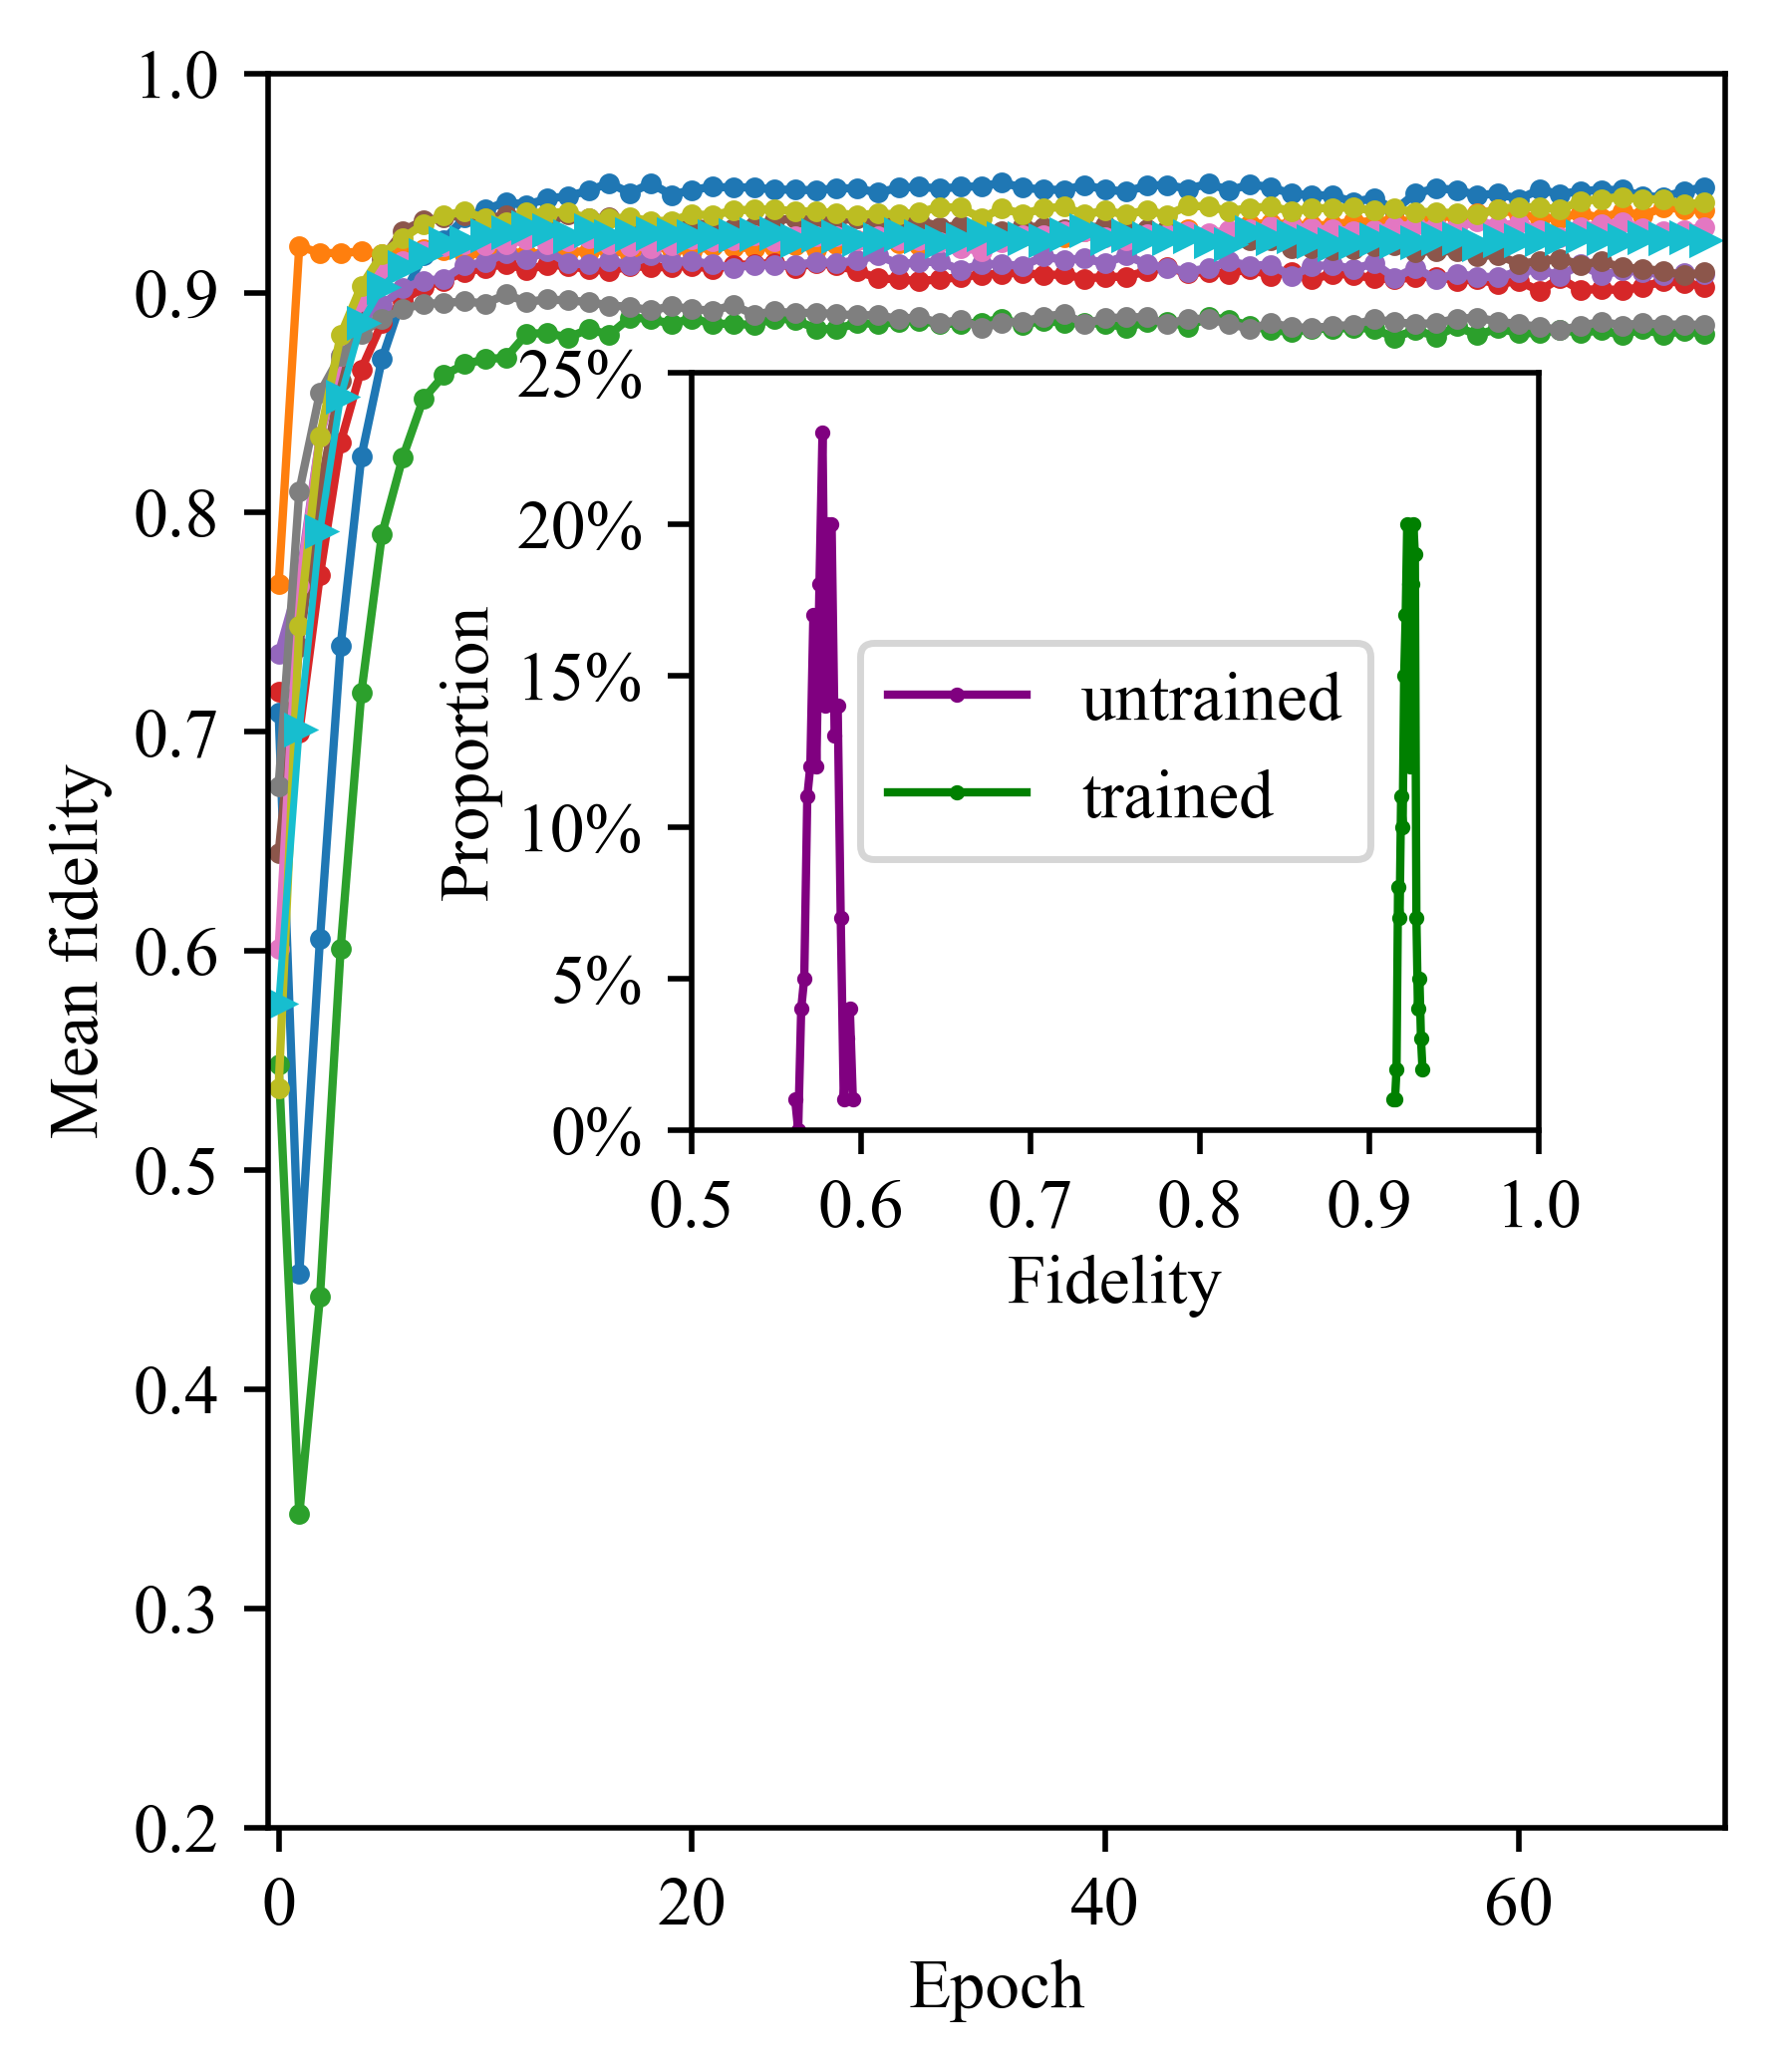

In [5]:
plt.rc('font', family = "Times New Roman", size = 10) #字体样式和大小
fig, ax = plt.subplots(figsize=(3.4,4), dpi=500)

ax.set_xlim(left = -0.5,right = 70); ax.set_ylim(bottom = 0.2, top = 1)

for i in range(1,10):
    ax.plot(learning_curves[i], linestyle = '-', marker = 'o', markersize = 2, linewidth = 1.2)
    
ax.plot(learning_curves[0], linestyle = '-', marker = '>', markersize = 3.5, linewidth = 1)
ax.set_xlabel('Epoch', labelpad = 3)  
ax.set_ylabel("Mean fidelity", labelpad = 3)  

# ax.grid(color = 'gray', linestyle = '--', linewidth = 0.15)


#-----------------------------------------------------------------------------------------
left, bottom, width, height = 0.38,0.45,0.5,0.38
ax2 = fig.add_axes([left, bottom, width, height])
ax2.set_xlim(left = 0.5, right = 1); ax2.set_ylim(bottom = 0, top = 25);

# 轴坐标范围
ax2.yaxis.set_major_locator(ticker.MultipleLocator(5))
ax2.xaxis.set_major_locator(ticker.MultipleLocator(0.1))

# 轴标签 
ax2.set_ylabel('Proportion', labelpad = 2)
ax2.set_xlabel('Fidelity', labelpad = 2)

def make_label(value, pos):
    return '%0.0f%%' % (value)
ax2.yaxis.set_major_formatter(ticker.FuncFormatter(make_label))

#作图
ax2.plot(X_untrained, Y_untrained, color='purple', \
           linestyle = '-', marker = 'o', markersize = 1.2, linewidth = 1.2, label = 'untrained')
ax2.plot(X_trained, Y_trained, color='green', \
          linestyle = '-', marker = 'o', markersize = 1.2, linewidth = 1.2, label = 'trained')

ax2.legend(title = '', loc = "center") ;


plt.subplots_adjust(left = 0.13, bottom = 0.1, top = 0.98,right = 0.99, hspace = None, wspace = None) ;

fig.savefig('fig-exp_result_one_qubit_channel.pdf', format='pdf')